<a href="https://colab.research.google.com/github/Mr-Moeen/Prodigy_DataScience_Task-2/blob/main/datascience_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



                    **Task-02**

**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.** **bold text**

In [1]:
#Tools&Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
df=pd.read_csv('/content/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
len(df)

891

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df['Age'].median()

28.0

In [15]:
# Here, we handle missing values in the 'Age' and 'Embarked' columns by imputing them with the mean and mode.
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
# Drop specified columns: 'Name', 'Ticket', 'Cabin'
df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [19]:
df.replace({"C":1, "Q":2, "S":3},inplace=True) # convert string into int
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,3
887,888,1,1,female,19.0,0,0,30.0000,3
888,889,0,3,female,28.0,1,2,23.4500,3
889,890,1,1,male,26.0,0,0,30.0000,1


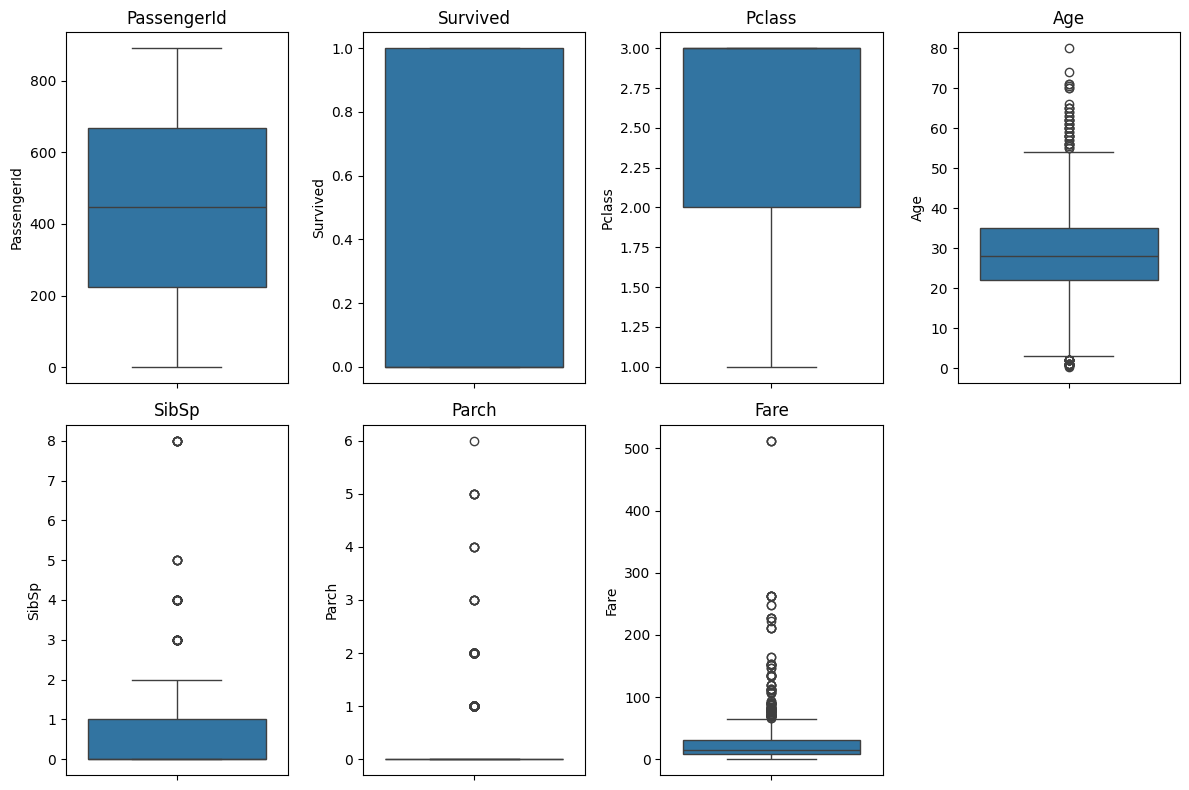

In [21]:
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Step 1: Visualize the distribution using box plots
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.subplot(2, 4, numerical_columns.index(column) + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [22]:
# Step 2: Identify and remove outliers using Z-score
z_score_threshold = 3
z_scores = stats.zscore(df[numerical_columns])
outliers = (abs(z_scores) > z_score_threshold).any(axis=1)
data = df[~outliers]

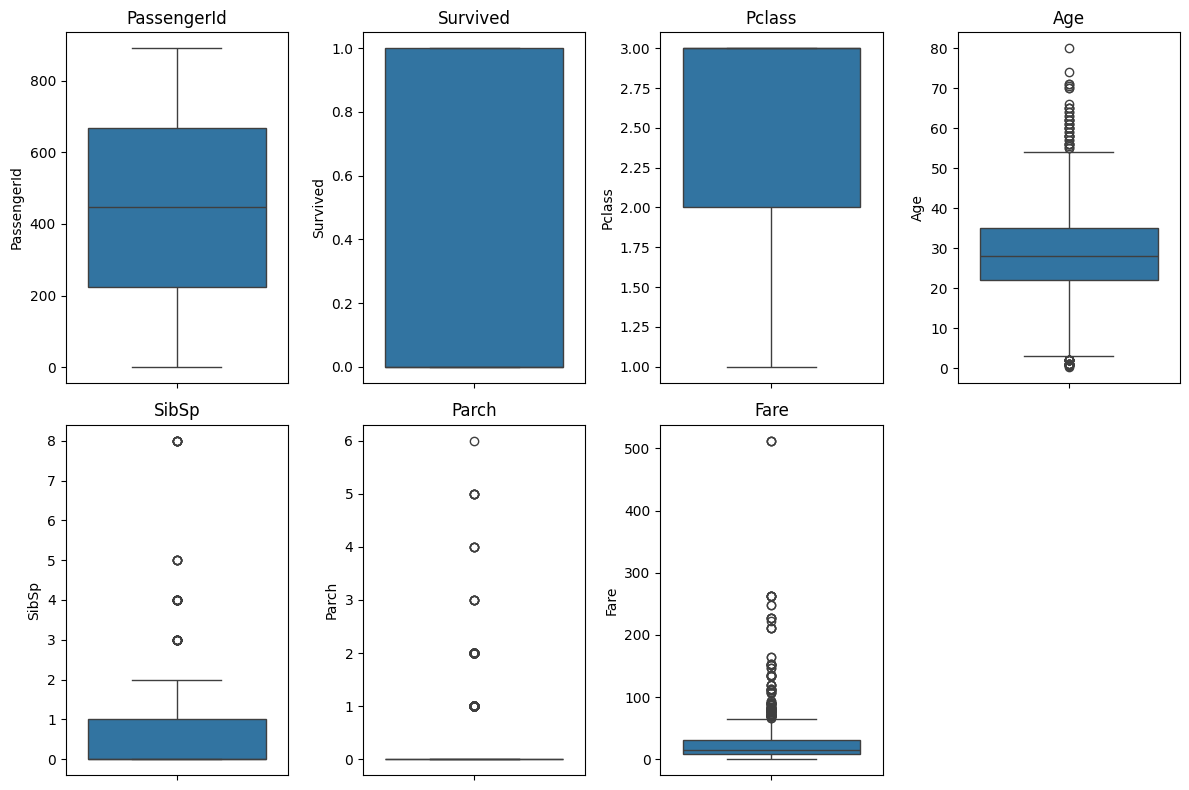

In [23]:
# Step 3: Visualize the distribution after removing outliers
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.subplot(2, 4, numerical_columns.index(column) + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [24]:
# summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,445.719512,0.390244,2.310976,29.444720,0.348780,0.254878,25.836051,2.540244
std,255.213085,0.488103,0.826678,12.173461,0.619434,0.565308,29.817529,0.788866
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,226.750000,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800,2.000000
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000,3.000000
75%,661.250000,1.000000,3.000000,35.000000,1.000000,0.000000,27.000000,3.000000
max,891.000000,1.000000,3.000000,66.000000,3.000000,2.000000,164.866700,3.000000


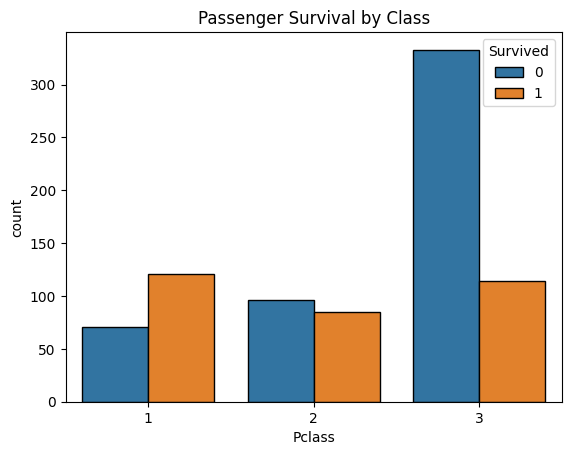

In [25]:
 #Visualize the distribution of passengers by class
sns.countplot(x='Pclass', data=data,hue='Survived',edgecolor='black')
plt.title('Passenger Survival by Class');

# higher number of passengers in the third class did not survive.

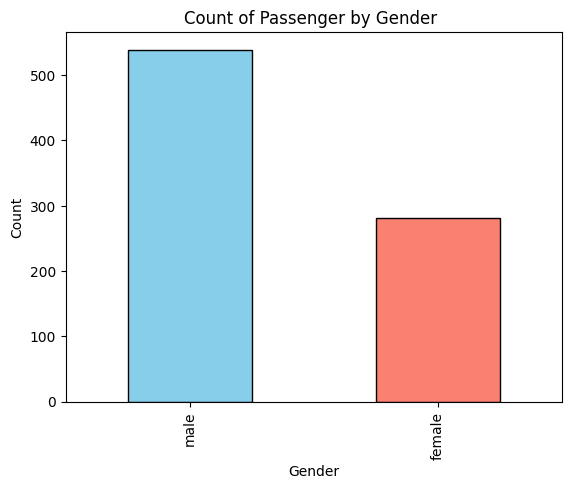

In [26]:
data['Sex'].value_counts().plot(kind='bar',
                                color=('skyblue','salmon'),
                               edgecolor='black')
plt.title('Count of Passenger by Gender ')
plt.xlabel('Gender')
plt.ylabel('Count');

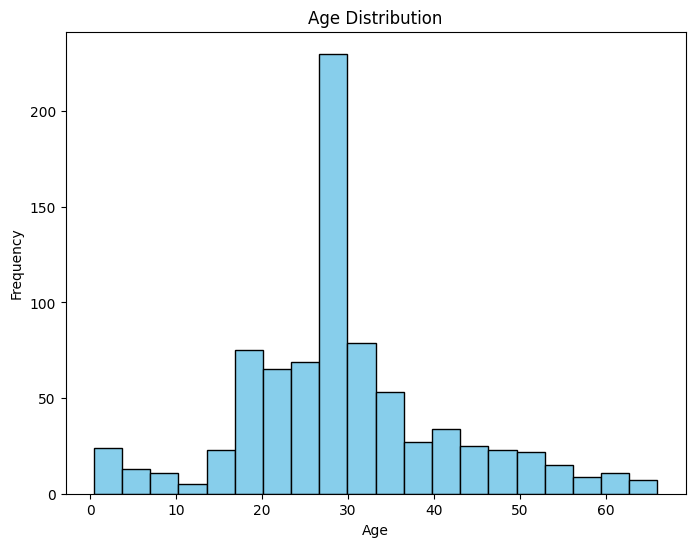

In [27]:
plt.figure(figsize=(8,6))
data['Age'].plot(kind='hist', bins=20, color='skyblue',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

<Figure size 600x400 with 0 Axes>

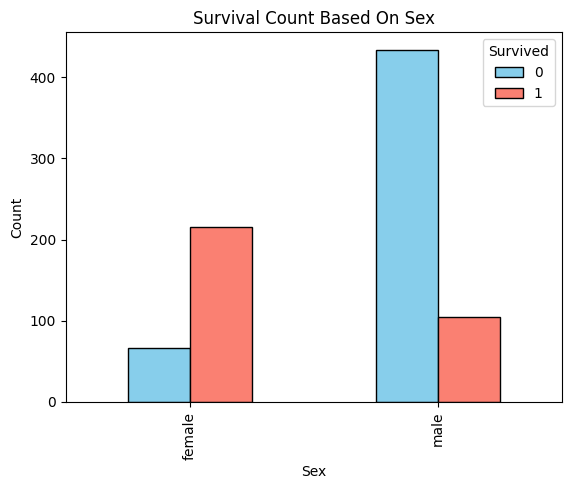

In [28]:
# Visualize survival based on sex
plt.figure(figsize=(6,4))
data.groupby(['Sex','Survived']).size().unstack().plot(kind='bar',
                                                       color=['skyblue','salmon'],
                                                       edgecolor='Black')
plt.title('Survival Count Based On Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show();

<ipython-input-29-9640b8797130>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"male":1,"female":0},inplace=True)


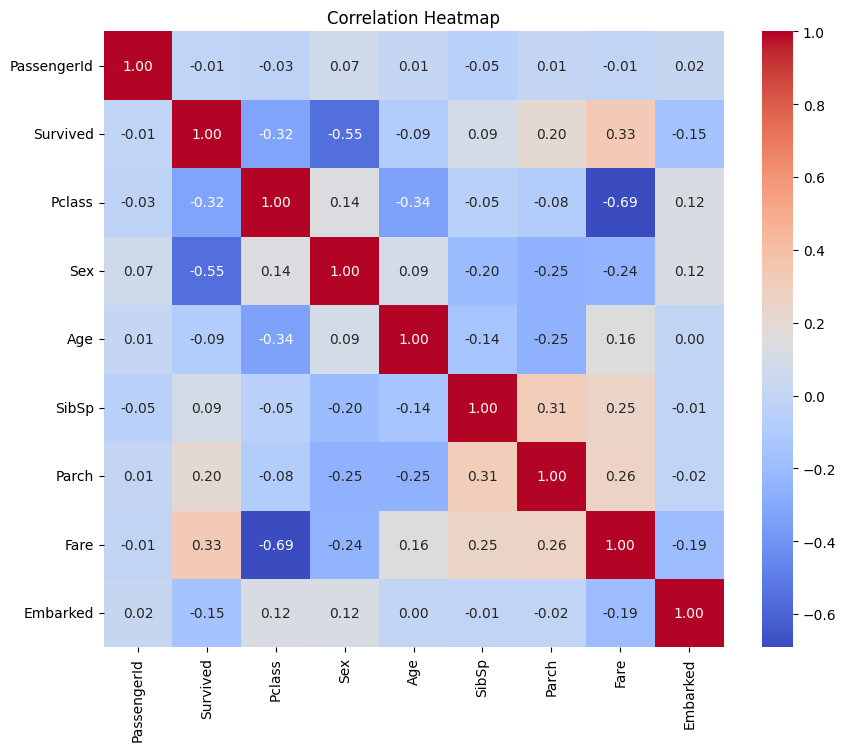

In [29]:
data.replace({"male":1,"female":0},inplace=True)


correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()